In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from tqdm import tqdm
import pymongo

In [2]:
matrix = pd.read_csv('database.csv')

In [3]:
matrix.head()

,0114709,0113228,0113277,0114369,0114814,0116367,0115734,0112573,0114287,0109370,...,0064265,3748512,2386404,4935334,0206334,0118745,0066806,0798722,1540011,3835080
0,4.0,4.0,4.0,5.0,5.0,3.0,5.0,4.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.5,0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.5,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.5,0.0,0.0,4.0,4.5,0.0,0.0,4.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data = np.array(matrix)

In [4]:
def mse(matrix, predictions):
    matrix = matrix.flatten()
    predictions = predictions.flatten()
    nonzero = np.nonzero(matrix)
    return mean_squared_error(matrix[nonzero], predictions[nonzero])

In [5]:
def similarity(matrix):
    product = np.dot(matrix, matrix.T)
    diagonal = np.sqrt(np.diagonal(product)).reshape(1,-1)
    return product / diagonal / diagonal.T

In [9]:
def useruser(matrix, k):
    cosine = similarity(matrix)
    users = matrix.shape[0]
    movies = matrix.shape[1]
    predictions = np.zeros(matrix.shape)
    for i in range(users):
        friends = cosine[i].argsort()[-(k+1):-1]
        for j in range(movies):
            predictions[i,j] = np.sum(matrix[:,j][friends] * cosine[i][friends]) / np.sum(np.abs(cosine[i][friends]))
    return predictions

In [10]:
def itemitem(matrix, k):
    matrix = matrix.T
    cosine = similarity(matrix)
    movies = matrix.shape[0]
    users = matrix.shape[1]
    predictions = np.zeros(matrix.shape)
    for i in tqdm(range(movies)):
        friends = cosine[i].argsort()[-(k+1):-1]
        for j in range(users):
            predictions[i,j] = np.sum(matrix[:,j][friends] * cosine[i][friends]) / np.sum(np.abs(cosine[i][friends]))
    return predictions.T

In [49]:
y = useruser(matrix, 40)

In [55]:
x = itemitem(matrix, 40)

100%|██████████| 9724/9724 [01:03<00:00, 154.17it/s]


In [56]:
mse(matrix, x)

12.481951840792537

In [26]:
error = []
for i in range(1,20):
    predictions = rating(matrix, i)
    predictions = np.where(np.isnan(predictions), 0, predictions)
    error.append(mse(matrix, predictions))

/home/himanshu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


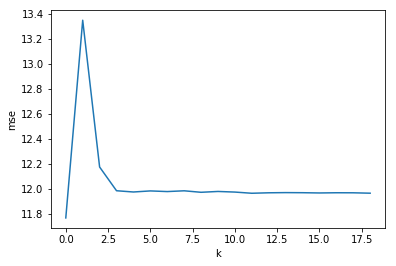

In [27]:
plt.plot(error)
plt.xlabel('k')
plt.ylabel('mse')
plt.show()